In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
data = pd.read_csv('housing_dataset.csv')

In [78]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [80]:
data.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,64.500000,130427.343750,2000.937500,3.023438,2.445312,2.578125
std,37.094474,26868.770371,211.572431,0.725951,0.514492,1.069324
min,1.000000,69100.000000,1450.000000,2.000000,2.000000,1.000000
25%,32.750000,111325.000000,1880.000000,3.000000,2.000000,2.000000
50%,64.500000,125950.000000,2000.000000,3.000000,2.000000,3.000000
75%,96.250000,148250.000000,2140.000000,3.000000,3.000000,3.000000
max,128.000000,211200.000000,2590.000000,5.000000,4.000000,6.000000


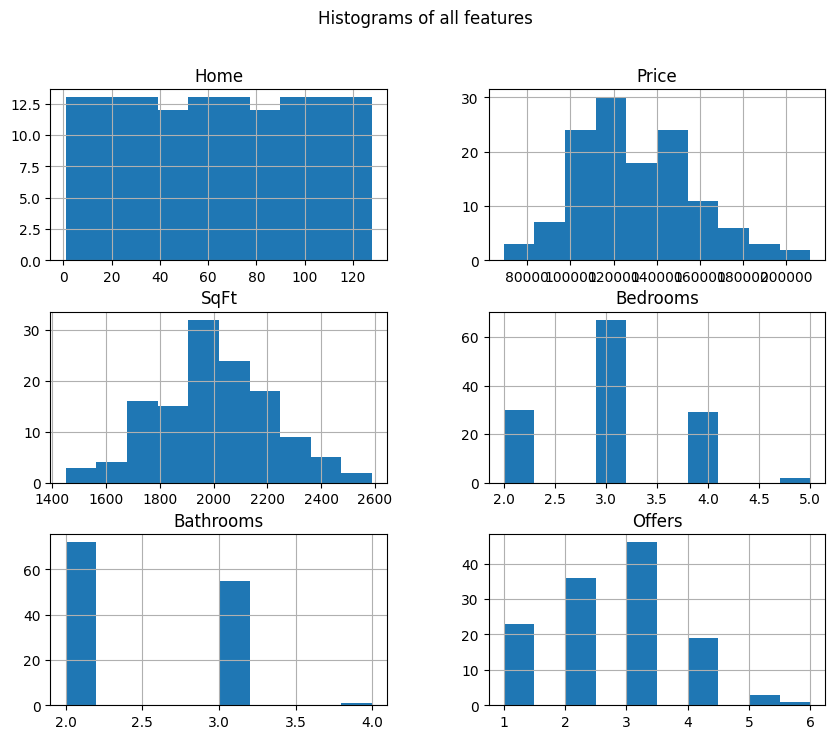

In [81]:
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of all features")
plt.show()

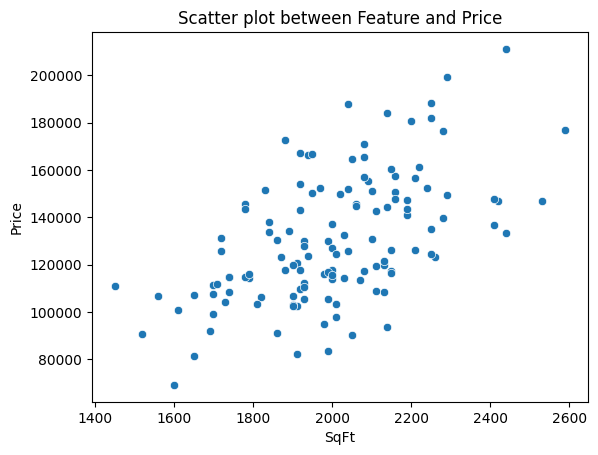

In [82]:
sns.scatterplot(x=data['SqFt'], y=data['Price'])
plt.title('Scatter plot between Feature and Price')
plt.show()

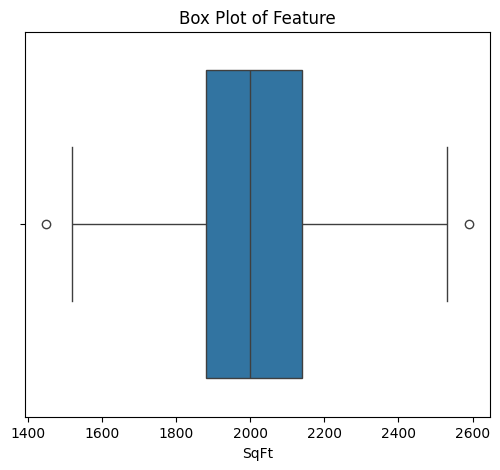

In [83]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=data['SqFt'])
plt.title('Box Plot of Feature')
plt.show()

In [154]:
Q1 = data['SqFt'].quantile(0.20)  
Q3 = data['SqFt'].quantile(0.80)  
IQR = Q3 - Q1 
IQR

np.float64(326.0)

In [155]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
upper_bound

1345.0


np.float64(2649.0)

In [156]:
outliers = data[(data['SqFt'] < lower_bound) | (data['SqFt'] > upper_bound)]
outliers

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood


In [157]:
data_no_outliers = data[(data['SqFt'] >= lower_bound) & (data['SqFt'] <= upper_bound)]
data_no_outliers

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [158]:
X = data_no_outliers[['SqFt']]
Y = data_no_outliers['Price']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35)

In [190]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [191]:
y_pred = model.predict(X_test)

In [192]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 621062022.05
R-squared: 0.33


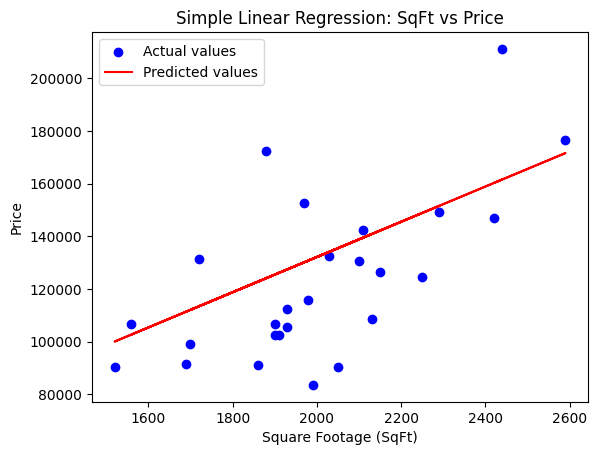

In [193]:
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', label='Predicted values') 
plt.title('Simple Linear Regression: SqFt vs Price')
plt.xlabel('Square Footage (SqFt)')
plt.ylabel('Price')
plt.legend()
plt.show()